# Задача классификации сигналов

Дьяконов А.Г., 2023

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [1]:
import numpy as np
import pandas as pd
import time

%pylab inline
#plt.style.use('seaborn-dark')
#import warnings
#warnings.filterwarnings("ignore")
#pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

# import seaborn as sns
%matplotlib inline

%config Completer.use_jedi = False

Populating the interactive namespace from numpy and matplotlib


## несколько полезных функций для визуализации

In [2]:
def show_signals(X, y, figsize=(7, 3), xlabel='время', ylabel='значения'):
    plt.figure(figsize=figsize)
    
    plt.plot([], lw=2, c='#000099', label='класс 1')
    plt.plot([], lw=2, c='#FF9999', label='класс 0')
    
    for i in range(X.shape[0]):
        if y[i]>0:
            plt.plot(X[i,:], lw=2, c='#000099')
        else:
            plt.plot(X[i,:], lw=2, c='#FF9999')
            
    plt.legend(loc=(1,0))
    plt.grid(lw=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim([0, X.shape[1]])
    

In [3]:
def show_scatter(f, g, y, size=20, figsize=(5, 4.5), eps=0.2, random=True, xlabel='признак 1', ylabel='признак 2', lims=None):
    plt.figure(figsize=figsize)
    if random:
        # для легенды
        plt.scatter([], [], size, c='#000099', label='класс 1', edgecolors='white', linewidth=0.5)
        plt.scatter([], [], size, marker='s', c='#FF9999', label='класс 0', edgecolors='black', linewidth=0.5)
        for i in range(len(y)):
            if y[i]>0:
                plt.scatter([f[i]], [g[i]], size, c='#000099', edgecolors='white', linewidth=0.5)
            else:
                plt.scatter([f[i]], [g[i]], size, marker='s', c='#FF9999', edgecolors='black', linewidth=0.5)
                
    else:
        plt.scatter(f[y > 0], g[y > 0], size, c='#000099', label='класс 1', edgecolors='white', linewidth=0.5)
        plt.scatter(f[y <= 0], g[y <=0 ], size, marker='s', c='#FF9999', label='класс 0', edgecolors='black', linewidth=0.5)
    # plt.plot([],[],'k', label='модель')
    if lims is None:
        plt.xlim([min(f) - eps, max(f) + eps])
        plt.ylim([min(g) - eps, max(g) + eps])
    else:
        plt.xlim(lims[0])
        plt.ylim(lims[1])
    plt.legend(loc=(1,0))
    plt.grid(lw=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [4]:
def show_scatter2(f, g, y, f2, g2, size=20, figsize=(5, 4.5), eps=0.2, random=True, xlabel='признак 1', ylabel='признак 2', lims=None):
    """
    + тест
    """
    plt.figure(figsize=figsize)
    if random:
        # для легенды
        plt.scatter([], [], size, c='#000099', label='класс 1', edgecolors='white', linewidth=0.5)
        plt.scatter([], [], size, marker='s', c='#FF9999', label='класс 0', edgecolors='black', linewidth=0.5)
        plt.scatter(f2, g2, size*0.8, c='white', edgecolors='black', linewidth=1.0, label='тест')
        for i in range(len(y)):
            if y[i]>0:
                plt.scatter([f[i]], [g[i]], size, c='#000099', edgecolors='white', linewidth=0.5)
            else:
                plt.scatter([f[i]], [g[i]], size, marker='s', c='#FF9999', edgecolors='black', linewidth=0.5)
        
                
    else:
        plt.scatter(f[y > 0], g[y > 0], size, c='#000099', label='класс 1', edgecolors='white', linewidth=0.5)
        plt.scatter(f[y <= 0], g[y <=0 ], size, marker='s', c='#FF9999', label='класс 0', edgecolors='black', linewidth=0.5)
    # plt.plot([],[],'k', label='модель')
    if lims is None:
        plt.xlim([min([min(f), min(f2)]) - eps, max([max(f), max(f2)]) + eps])
        plt.ylim([min([min(g), min(g2)]) - eps, max([max(g), max(g2)]) + eps])
    else:
        plt.xlim(lims[0])
        plt.ylim(lims[1])
    plt.legend(loc=(1,0))
    plt.grid(lw=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [5]:
train = pd.read_csv('./Ford_A_train.data', sep=' ', header=None)
y_train = pd.read_csv('./Ford_A_train.labels', sep=' ', header=None)

# valid = pd.read_csv('./Ford_A_valid.data', sep=' ', header=None)
# y_valid = pd.read_csv('./Ford_A_valid.labels', sep=' ', header=None)

In [7]:
# удаление лишнего

del train[train.columns[-1]]
# del valid[valid.columns[-1]]

In [8]:
y = (1+y_train[y_train.columns[0]].values)/2
# y2 = (1+y_valid[y_valid.columns[0]].values)/2

In [10]:
print (train.shape, y.shape) # , valid.shape, y2.shape)

(3271, 500) (3271,)


In [11]:
y

array([0., 1., 0., ..., 0., 1., 1.])

In [12]:
train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-215.000,-179.000,-100.000,12.200,144.000,268.000,368.000,429.000,451.00,446.00,...,305.000,197.0000,99.300,26.100,-20.900,-56.500,-105.000,-179.000,-290.000,-423.000
1,512.655,403.697,236.538,22.028,-220.774,-476.723,-712.788,-895.652,-1007.56,-1039.41,...,244.813,28.9855,-167.743,-329.328,-440.102,-497.818,-505.139,-460.097,-361.242,-206.755
2,221.000,25.000,-169.000,-350.000,-512.000,-643.000,-742.000,-806.000,-832.00,-821.00,...,115.000,137.0000,151.000,154.000,150.000,141.000,129.000,115.000,97.500,70.800
3,-77.800,-158.000,-227.000,-291.000,-349.000,-404.000,-454.000,-489.000,-493.00,-459.00,...,-293.000,-286.0000,-284.000,-286.000,-280.000,-258.000,-216.000,-151.000,-64.100,28.300
4,-6.850,3.260,30.900,74.900,124.000,162.000,183.000,182.000,167.00,145.00,...,81.000,76.3000,73.700,76.900,84.000,86.900,77.000,49.600,6.570,-46.800


In [68]:
#x = []
#with open('./DATA/Ford_A_train.data') as f:
#    for line in f:
#        x.append(line)
#len([float(a) for a in x[3].split(' ')[:-1]])

## посмотрим на сигналы

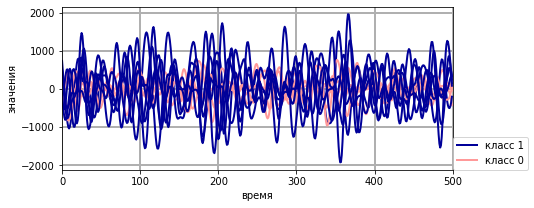

In [14]:
m_show = 10
show_signals(train.head(m_show).values, y[:m_show])

## Придумываем разные признаки

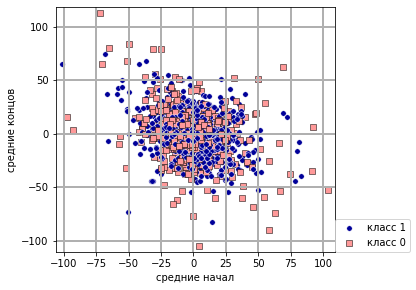

In [16]:
f1 = train.values[:,:250].mean(axis=1)
f2 = train.values[:,250:].mean(axis=1)
#show_scatter(f1[:100], f2[:100], y[:100], size=30, eps=5, random=True)
show_scatter(f1, f2, y, size=30, eps=5, random=True, xlabel='средние начал', ylabel='средние концов')

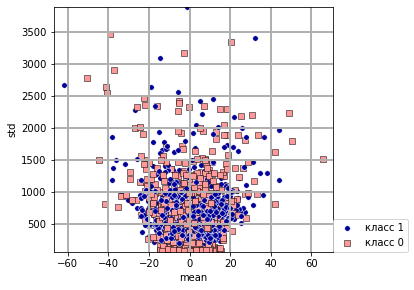

In [17]:
f1 = train.values.mean(axis=1)
f2 = train.values.std(axis=1)
#show_scatter(f1[:100], f2[:100], y[:100], size=30, eps=5, random=True)
show_scatter(f1, f2, y, size=30, eps=5, random=True, xlabel='mean', ylabel='std')

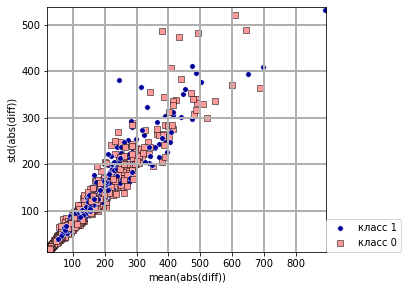

In [18]:
XX = np.abs(np.diff(train.values, axis=1))
f1 = XX.mean(axis=1)
f2 = XX.std(axis=1)
show_scatter(f1, f2, y, size=30, eps=5, random=True, xlabel='mean(abs(diff))', ylabel='std(abs(diff))')

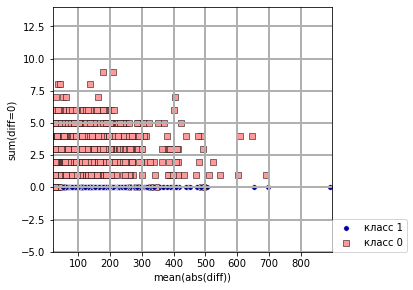

In [19]:
XX = np.abs(np.diff(train.values, axis=1))
f1 = XX.mean(axis=1)
f2 = np.sum(XX==0, axis=1)
show_scatter(f1, f2, y, size=30, eps=5, random=True, xlabel='mean(abs(diff))', ylabel='sum(diff=0)')

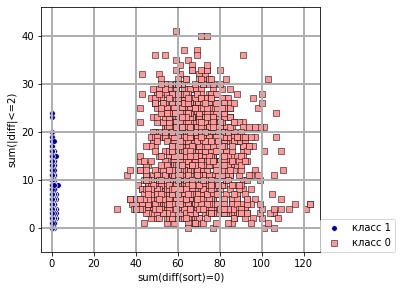

In [20]:
f1 = np.sum(np.diff(np.sort(train.values, axis=1), axis=1)==0, axis=1)
f2 = np.sum(np.abs(np.diff(train.values, axis=1))<=2, axis=1)
show_scatter(f1, f2, y, size=30, eps=5, random=True, xlabel='sum(diff(sort)=0)', ylabel='sum(|diff|<=2)')

## получение ответа

In [21]:
2 * (np.sum(np.diff(np.sort(train.values, axis=1), axis=1) == 0, axis=1) < 20) - 1

array([-1,  1, -1, ..., -1,  1,  1])

# Другая задача

In [38]:
import scipy.io as sio
BCI_signals = sio.loadmat('mdata.mat')

In [39]:
X = BCI_signals['X']
y = BCI_signals['Y'][:,0]
Z = BCI_signals['Z']
print (X.shape, y.shape, Z.shape)

(7, 278, 3000) (278,) (7, 100, 3000)


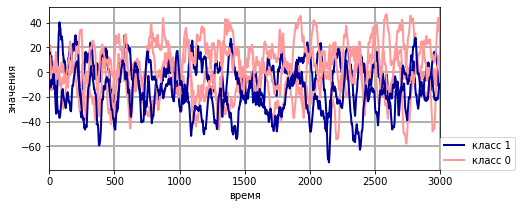

In [37]:
m_show = 5
show_signals(train[:m_show, :], y[:m_show])

In [40]:
t = 1 # номер электрода
train = X[t, :]
train.shape

(278, 3000)

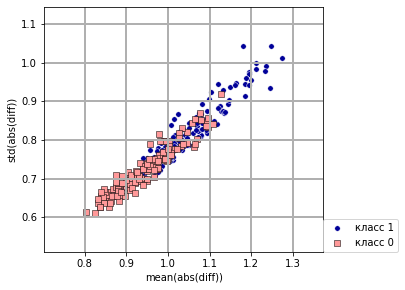

In [36]:
XX = np.abs(np.diff(train, axis=1))
f1 = XX.mean(axis=1)
f2 = XX.std(axis=1)
show_scatter(f1, f2, y, size=30, eps=0.1, random=False, xlabel='mean(abs(diff))', ylabel='std(abs(diff))')

### Если хотим csv-формат

In [43]:
BCI = pd.DataFrame(train)
BCI['y'] = y
BCI
BCI.to_csv('BCIX1.csv')

In [45]:
pd.read_csv('BCIX1.csv', index_col=0)

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,y
0,22.62500,22.46875,22.31250,22.21875,22.06250,21.84375,20.71875,19.09375,18.31250,17.40625,...,0.37500,0.03125,-0.68750,-1.56250,-1.34375,-0.78125,-2.03125,-3.62500,-4.40625,-1
1,15.00000,16.15625,15.90625,15.00000,14.59375,14.21875,13.03125,11.62500,10.53125,9.46875,...,-10.62500,-10.25000,-10.53125,-9.43750,-9.46875,-10.68750,-11.65625,-12.00000,-12.96875,1
2,10.59375,11.31250,12.03125,12.56250,12.75000,13.12500,13.53125,12.84375,11.56250,9.21875,...,12.96875,13.43750,13.09375,12.43750,11.53125,10.28125,8.81250,7.03125,5.71875,-1
3,-6.18750,-5.84375,-5.28125,-5.84375,-7.12500,-8.59375,-9.37500,-9.50000,-10.31250,-11.62500,...,36.56250,34.96875,33.96875,33.46875,33.18750,33.06250,33.40625,33.78125,35.65625,-1
4,-12.56250,-11.96875,-11.21875,-10.56250,-10.37500,-10.59375,-10.71875,-11.09375,-11.78125,-12.40625,...,-13.28125,-12.37500,-12.53125,-12.78125,-11.56250,-10.50000,-10.25000,-10.62500,-10.50000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,-14.84375,-12.59375,-12.18750,-11.96875,-10.87500,-9.93750,-10.06250,-10.90625,-10.53125,-9.09375,...,-10.37500,-9.62500,-8.03125,-6.28125,-6.06250,-6.68750,-6.56250,-6.15625,-5.75000,-1
274,-8.34375,-7.25000,-5.68750,-4.06250,-2.25000,-0.21875,2.18750,4.93750,7.34375,8.21875,...,1.78125,4.31250,6.71875,8.12500,8.59375,8.78125,9.56250,10.00000,10.15625,1
275,11.84375,12.00000,12.84375,12.56250,11.18750,10.59375,9.68750,9.62500,10.28125,11.75000,...,-7.12500,-10.03125,-11.62500,-11.59375,-11.59375,-12.00000,-11.12500,-9.25000,-7.46875,-1
276,9.34375,9.53125,10.71875,10.65625,9.25000,8.50000,8.09375,8.03125,7.43750,6.53125,...,8.62500,10.87500,13.18750,15.21875,17.90625,19.75000,21.21875,23.75000,26.09375,1
